In [1]:
### imports

# external modules
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../utils/'))
# add the paths to import local modules



# local modules
import get_oms_data
# importlib.reload(get_oms_data)  # not needed unless making live changes to the modules
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

import json_utils as jsonu
import plot_utils as pu

In [59]:
import mplhep as hep
# import matplotlib as matplot
# matplot.style.use(hep.style.cms)
plt.style.use(hep.style.ROOT)

In [14]:
def has_fill(df):
    dfcopy=df[df.fill_number.isna() == False].copy()
    return dfcopy

def add_loc_wrt_fill(df):
    import numpy as np
    dfcopy= df.copy()
    dfcopy["Fill location"] = np.empty(len(dfcopy))
    temp=dfcopy.groupby("fill_number")["run_number"].transform('count')    
    x=1
    for count,i in enumerate(temp):
        if x==i :
            dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
            x=1
            continue
        dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
        x+=1
        
    return dfcopy


# def add_loc_wrt_run(df):
#     import numpy as np
#     dfcopy= df.copy()
#     dfcopy["Run location"] = np.empty(len(dfcopy))
#     temp=dfcopy.groupby("run_number")["run_number"].transform('count')    
#     x=1
#     for count,i in enumerate(temp):
#         if x==i :
#             dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
#             x=1
#             continue
#         dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
#         x+=1
        
#     return dfcopy


def makeDF(json):
    datadict=json['data'][0]['attributes']
    keys=datadict.keys()
    
    datasetlist=[]
    
    for i in range(len(json['data'])):
        values=json['data'][i]['attributes'].values()
        datasetlist.append(values)
    return pd.DataFrame(datasetlist,columns=keys)#\
#     .set_index(['fill_number','run_number'])\
#     .sort_index()

def convert_check_addFillLoc(json):
    """
    Expects a json from the run_number query
    
    """
    df=makeDF(json)
    #now filter out runs that don't  have fill number
    df=has_fill(df)
    #now add run location wrt fill
    DF_withloc=add_loc_wrt_fill(df)
    return DF_withloc


# def convert_check_addRunLoc(json):
#     """
#     Expects a json from the Lumisection query
    
#     """
#     df=makeDF(json)
#     #now filter out runs that don't  have fill number
#     df=has_fill(df)
#     #now add run location wrt fill
#     DF_withloc=add_loc_wrt_fill(df)
#     return DF_withloc


## Getting All runs in different eras 2018

Here are options for the run attributes
```python
['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field','tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update', 'beamactive_total_deadtime','recorded_lumi', 'delivered_lumi', 'cmssw_version',
'crossing_angle_stop', 'energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'crossing_angle_start', 'fill_type_party2','fill_type_party1', 'beta_star_start', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'clock_type', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam', 'beta_star_stop','hlt_physics_counter']
       
```

In [363]:
# example: get run information for a single run

runnb = (315190,315290) # 2018A
attributes=['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update','recorded_lumi', 'delivered_lumi','energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'fill_type_party2','fill_type_party1', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam','hlt_physics_counter']
run_info = get_oms_data( omsapi, 'runs', runnb ,limit_entries=5_000,attributes=attributes)
# print(run_info)

Unauthorized. Will try to obtain a new token
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=sequence,hlt_physics_counter,recorded_lumi,hlt_key,end_time,duration,l1_hlt_mode_stripped,energy,stable_beam,run_number,l1_menu,l1_key_stripped,l1_triggers_counter,hlt_physics_rate,l1_hlt_mode,fill_type_runtime,last_lumisection_number,end_lumi,delivered_lumi,components,fill_type_party1,initial_prescale_index,hlt_physics_size,fill_number,l1_rate,fill_type_party2,start_time,l1_key,last_update,init_lumi,hlt_physics_throughput,trigger_mode&filter[run_number][GE]=315190&filter[run_number][LE]=315290&page[offset]=0&page[limit]=5000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=sequence,hlt_physics_counter,recorded_lumi,hlt_key,end_time,duration,l1_hlt_mode_stripped,energy,stable_beam,run_number,l1_menu,l1_key_stripped,l1_triggers_counter,hlt_physics_rate,l1_hlt_mode,fill_type_runtime,last_lumisection_number,end_lumi,delivered_lumi,components,fill_type_party1,initial_prescale_index,hlt_physics_s

In [364]:
rundf=convert_check_addFillLoc(run_info)
rundf.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(55, 33)

In [365]:
rundf[['run_number']].nunique()

run_number    55
dtype: int64

In [366]:
rundf[rundf['run_number']< 315286 ]['run_number']

0     315190
1     315193
2     315194
8     315201
9     315205
10    315206
12    315210
13    315214
14    315215
15    315216
16    315218
17    315220
18    315224
19    315225
20    315226
21    315227
22    315228
23    315229
24    315230
25    315231
26    315232
27    315233
28    315234
29    315235
30    315236
31    315237
32    315238
33    315239
34    315240
35    315241
36    315242
37    315243
38    315244
40    315246
41    315247
42    315248
43    315249
44    315250
45    315252
48    315255
50    315257
51    315258
52    315259
53    315260
54    315262
55    315264
56    315265
57    315266
58    315267
59    315268
61    315270
62    315273
63    315274
64    315275
Name: run_number, dtype: int64

In [373]:
slimdf=rundf[['run_number','fill_number','Fill location',
 'recorded_lumi',
 'delivered_lumi','init_lumi',
 'end_lumi',
 'last_lumisection_number','stable_beam']]

In [374]:
slimdf

,run_number,fill_number,Fill location,recorded_lumi,delivered_lumi,init_lumi,end_lumi,last_lumisection_number,stable_beam
0,315190,6614.0,(1/1),7.581242,7.945422,0.363444,0.000000,115.0,True
1,315193,6615.0,(1/42),0.000000,0.000000,0.000000,0.000000,27.0,False
2,315194,6615.0,(2/42),0.000000,0.000000,0.000000,0.000000,149.0,False
8,315201,6615.0,(3/42),0.000000,0.000000,0.000000,0.000000,7.0,False
9,315205,6615.0,(4/42),0.000000,0.000000,0.000000,0.000000,6.0,False
10,315206,6615.0,(5/42),0.000000,0.000000,0.000000,0.000000,79.0,False
12,315210,6615.0,(6/42),0.000000,0.000000,0.000000,0.000000,106.0,False
13,315214,6615.0,(7/42),0.000000,0.000000,0.000000,0.000000,2.0,False
14,315215,6615.0,(8/42),0.000000,0.000000,0.000000,0.000000,9.0,False
15,315216,6615.0,(9/42),0.000000,0.000000,0.000000,0.000000,67.0,False


In [375]:
slimdf.isna().sum()

run_number                 0
fill_number                0
Fill location              0
recorded_lumi              0
delivered_lumi             0
init_lumi                  0
end_lumi                   0
last_lumisection_number    3
stable_beam                0
dtype: int64

## Lumisections Queries 

In [369]:
# # get the omsapi instance

# omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,315290) # 2018A
attributes = ['fill_number',"run_number",'lumisection_number',"physics_flag","cms_active",
              'pileup','delivered_lumi','recorded_lumi',"init_lumi",'end_lumi',
              'beam1_stable','beam2_stable','beam2_present','beam1_present']
ls_info = get_oms_data( omsapi, 'lumisections', runnb ,limit_entries=5_000,attributes=attributes)


https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=pileup,beam2_stable,fill_number,recorded_lumi,beam1_stable,beam2_present,beam1_present,cms_active,end_lumi,lumisection_number,physics_flag,run_number,delivered_lumi,init_lumi&filter[run_number][GE]=315190&filter[run_number][LE]=315290&page[offset]=0&page[limit]=5000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=pileup,beam2_stable,fill_number,recorded_lumi,beam1_stable,beam2_present,beam1_present,cms_active,end_lumi,lumisection_number,physics_flag,run_number,delivered_lumi,init_lumi&filter[run_number][GE]=315190&filter[run_number][LE]=315290&page[offset]=0&page[limit]=5000


In [370]:
ls_df=convert_check_addFillLoc(ls_info)
ls_df.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(4655, 15)

In [378]:
ls_df.isna().sum()

fill_number           0
beam1_present         0
physics_flag          0
lumisection_number    0
cms_active            0
beam1_stable          0
init_lumi             0
pileup                0
run_number            0
recorded_lumi         0
delivered_lumi        0
beam2_stable          0
end_lumi              0
beam2_present         0
Fill location         0
dtype: int64

In [379]:
ls_df.nunique()

fill_number              4
beam1_present            2
physics_flag             2
lumisection_number     663
cms_active               2
beam1_stable             2
init_lumi             2595
pileup                2502
run_number              52
recorded_lumi         1904
delivered_lumi        2171
beam2_stable             2
end_lumi              2594
beam2_present            2
Fill location         4655
dtype: int64

In [351]:
ls_df[ls_df['run_number']< 315286 ]

,fill_number,beam1_present,physics_flag,lumisection_number,cms_active,beam1_stable,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present
0,6614,True,True,1,True,True,0.363444,43.896393,315190,67.803109,74.081656,True,0.363079,True
1,6614,True,True,2,True,True,0.363079,43.852333,315190,67.884234,74.166281,True,0.362664,True
2,6614,True,True,3,True,True,0.362664,43.802155,315190,67.965141,74.250797,True,0.362341,True
3,6614,True,True,4,True,True,0.362341,43.763168,315190,68.019445,74.335195,True,0.362100,True
4,6614,True,True,5,True,True,0.362100,43.734123,315190,68.100352,74.419586,True,0.362182,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,6617,True,False,57,False,False,0.000000,0.000000,315275,0.000000,0.000000,False,0.000000,True
4589,6617,True,False,58,False,False,0.000000,0.000000,315275,0.000000,0.000000,False,0.000000,True
4590,6617,True,False,59,False,False,0.000000,0.000000,315275,0.000000,0.000000,False,0.000000,True
4591,6617,True,False,60,False,False,0.000000,0.000000,315275,0.000000,0.000000,False,0.000000,True


Last lumisection number for run 315190 was 115.0 on the Run dataframe.
Here we find out that it's due to CMS not being active after that LS

In [49]:
ls_df.iloc[110:120]#[['lumisection_number',"physics_flag","cms_active",'pileup','delivered_lumi','recorded_lumi']]

,fill_number,beam1_present,physics_flag,lumisection_number,cms_active,beam1_stable,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present
110,6614,False,True,111,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
111,6614,False,True,112,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
112,6614,False,True,113,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
113,6614,False,True,114,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
114,6614,False,True,115,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
115,6614,False,True,116,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
116,6614,False,True,117,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
117,6614,False,True,118,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
118,6614,False,True,119,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False
119,6614,False,True,120,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False


<AxesSubplot:>

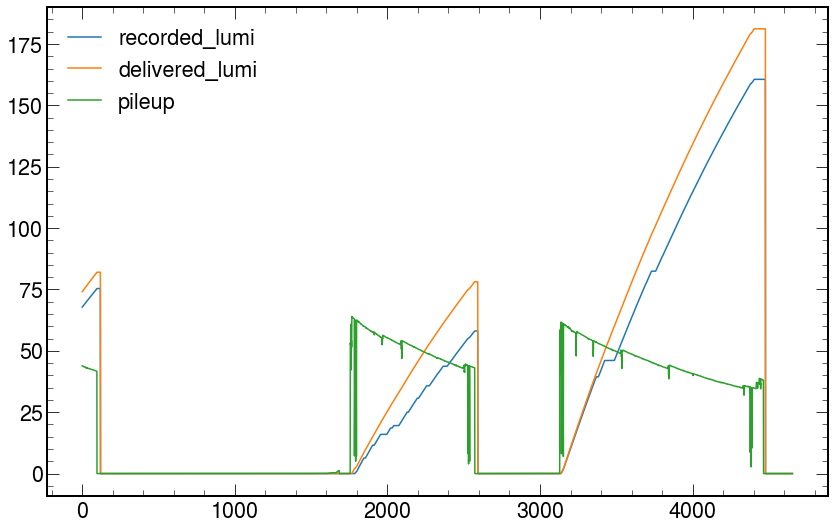

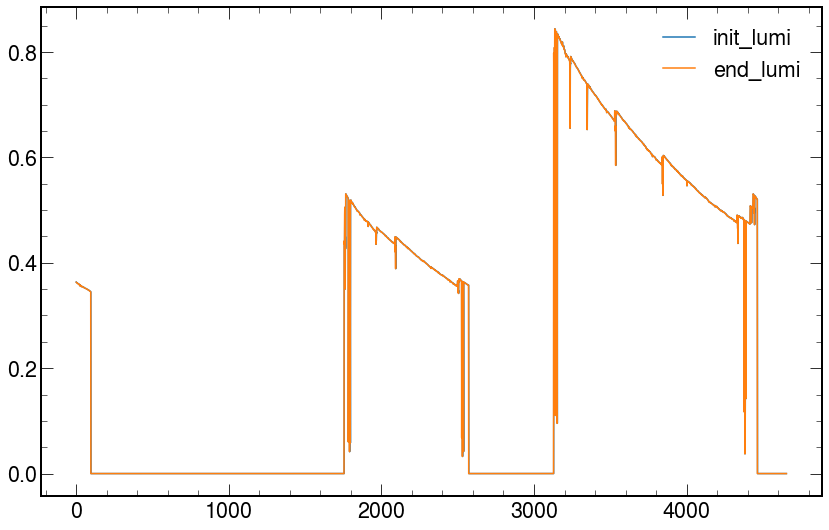

In [380]:
ls_df.plot(y=['recorded_lumi','delivered_lumi','pileup'],figsize=(14,9),logy=False)
ls_df.plot(y=['init_lumi','end_lumi'],figsize=(14,9),logy=False)

## For some reason the ls df does not have the same runs as the run df

In [391]:
templs=ls_df.groupby("run_number").groups.keys()
temprun=rundf[rundf['run_number']< 315286 ]['run_number']
print("ls df"," rundf")
count=0
for i,y in zip(templs,temprun):
    count+=1
    if i==y:
        print(i,y)
    else: 
        print(i,y," do not match")
print("should be",count,"equal entries but have less")
        

ls df  rundf
315190 315190
315193 315193
315194 315194
315201 315201
315205 315205
315206 315206
315210 315210
315214 315214
315215 315215
315216 315216
315218 315218
315220 315220
315224 315224
315225 315225
315226 315226
315227 315227
315228 315228
315229 315229
315231 315230  do not match
315232 315231  do not match
315234 315232  do not match
315235 315233  do not match
315236 315234  do not match
315237 315235  do not match
315238 315236  do not match
315239 315237  do not match
315240 315238  do not match
315242 315239  do not match
315243 315240  do not match
315244 315241  do not match
315246 315242  do not match
315247 315243  do not match
315248 315244  do not match
315249 315246  do not match
315250 315247  do not match
315252 315248  do not match
315255 315249  do not match
315257 315250  do not match
315258 315252  do not match
315259 315255  do not match
315260 315257  do not match
315262 315258  do not match
315264 315259  do not match
315265 315260  do not match
315266 

## It is useful to join the different dataframes into one dictionary for easier access

In [62]:
Df_dict={}
Df_dict['run']= pd.read_csv("2018AEra_runs.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-315286_LS.csv")

In [70]:
Df_dict['run'].nunique()

components                 101
l1_hlt_mode_stripped       102
l1_key                      53
duration                   690
l1_triggers_counter        716
hlt_physics_throughput     697
init_lumi                  153
last_update                811
recorded_lumi              142
delivered_lumi             153
energy                       2
end_lumi                   142
hlt_physics_rate           693
fill_number                115
l1_hlt_mode                 10
end_time                   811
trigger_mode               102
l1_key_stripped             53
fill_type_party2             1
fill_type_party1             1
initial_prescale_index      10
sequence                     1
start_time                 811
hlt_physics_size           668
fill_type_runtime            2
hlt_key                     36
last_lumisection_number    262
l1_rate                    715
l1_menu                      2
run_number                 811
stable_beam                  2
hlt_physics_counter        692
Fill loc

In [66]:
Df_dict['lumisections'].nunique()

fill_number              4
beam1_present            2
physics_flag             2
lumisection_number     663
cms_active               2
beam1_stable             2
init_lumi             2595
pileup                2502
run_number              52
recorded_lumi         1904
delivered_lumi        2171
beam2_stable             2
end_lumi              2594
beam2_present            2
Fill location         4655
dtype: int64

In [125]:
Df_dict.keys()

dict_keys(['run', 'lumisections'])

## Making the ranking system

In [86]:
isinstance(ls_df,pd.DataFrame)

# type(pd.DataFrame())

True

In [358]:
def ref_rank(dataframe,runnbs,sort=False,**kwargs):
    """
    Takes a run number and looks at all the numbers before it in the given pandas dataframe.
    If run number is the first in the frame retruns Null
    
    Usage:
    ref_rank(dataframe,runnbs,sort=False,**kwargs)
    
    Returns:
    dataframe with rank of run numbers
    By default the rank of the runnb given is 1
    
    """
    if isinstance(dataframe,(pd.DataFrame,dict)):
        pass
    else:
        raise TypeError("Expecting a pandas dataframe or dictionary but got something else")
        
    if runnbs not in dataframe['lumisections']['run_number'].values:
        for i in dataframe['run']['run_number']:
            if abs(runnbs - i) < 10:
                print("You can try {} ".format(i))
        raise KeyError("{} not in the the dataframe".format(runnbs))
        
        
        
        
    runstocheck=dataframe['run'][dataframe['run']['run_number']< runnbs ]
    
    # get run_number ranks based on distance
    run_place = runnbs-runstocheck['run_number']  
    runstocheck['run_rank']=run_place
    
    print('len(run_place)',len(run_place))

    
    # get run_number pileups
    ls_skim=dataframe['lumisections'][dataframe['lumisections']["run_number"]< runnbs ]
    
    ls_pileup= ls_skim.groupby(['run_number'])['pileup'].mean()
    
    print("ls_pileup values",ls_pileup.values)
    
    rnnbspileup= dataframe['lumisections'].groupby(['run_number'])['pileup'].mean().loc[runnbs]
    
    print("rnnbspileup",rnnbspileup)
    
    print('checking rank\n',abs(rnnbspileup -ls_pileup.values))

    print('len(ls_pileup.values)',len(ls_pileup.values))

    
    
    
    
    
    runstocheck['pileup_rank']= abs(rnnbspileup -ls_pileup.values)
    
    return runstocheck
    
    ### check the pileup ####
    
    
#     if len(kwargs)==0: 
#         pass
#     else:
#         print(kwargs)
#         if "run_number" in kwargs:
#             run = kwargs['run_number']
#             print(run)
            
#         if "ls_number"in kwargs:
#             ls= kwargs['lumisection_number']
#             print(ls)
    

In [359]:
ref_rank(Df_dict,315286)#[['run_number','run_rank','pileup_rank']]

len(run_place) 54
ls_pileup values [2.91868773e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.04460733e-04
 2.06685204e-01 3.40766372e-03 3.47713084e+01 5.69606970e+01
 5.84193376e+01 5.60377743e+01 5.48890017e+01 5.38942068e+01
 5.32954122e+01 5.29923553e+01 5.31242985e+01 5.17254977e+01
 4.95909017e+01 4.73171257e+01 4.57703000e+01 3.61916904e+01
 0.00000000e+00 1.52554796e-04 5.14464014e+01 5.21557385e+01
 5.06057351e+01 4.80307359e+01 4.48648855e+01 3.88477402e+01
 1.83662423e+01 0.00000000e+00 0.00000000e+00]
rnnbspileup 0.0
checking rank
 [2.91868773e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.

<ipython-input-358-448f0f31f536>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['run_rank']=run_place


ValueError: Length of values (51) does not match length of index (54)

In [284]:
Df_dict['lumisections'][['run_number','pileup','lumisection_number']].loc[800:999]
Df_dict['lumisections']['run_number'].unique()

array([315190, 315193, 315194, 315201, 315205, 315206, 315210, 315214,
       315215, 315216, 315218, 315220, 315224, 315225, 315226, 315227,
       315228, 315229, 315231, 315232, 315234, 315235, 315236, 315237,
       315238, 315239, 315240, 315242, 315243, 315244, 315246, 315247,
       315248, 315249, 315250, 315252, 315255, 315257, 315258, 315259,
       315260, 315262, 315264, 315265, 315266, 315267, 315268, 315270,
       315273, 315274, 315275, 315286])

In [183]:
temp=Df_dict['run'][Df_dict['run']["run_number"]< 315209 ]


In [193]:
if 315201 in temp['run_number'].values:
    print("yes")
else:
    print('no')

yes


In [192]:
temp['run_number'].values

array([315190, 315193, 315194, 315201, 315205, 315206])